# CEE 498: Transportation Economics

## Assignment Two: Transit Pricing

Noah Garfinkle (garfink2@illinois.edu)

07 February 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize

# Problem 1

## Part a

In [2]:
def Q(P,α=3.0,β=0.6,c=0.8,C=1.0):
    """ 
    Calculates quantity demanded for the exponential demand function. 
  
    Defaults and units per problem one
  
    Parameters: 
    P (float): Price 
    α (float): default of 3.0
    β (float): default of 0.6
    c (float): operating cost per ride, default of 0.8
    C (float): capacity cost, default is 1.0
  
    Returns: 
    int: Description of return value 
    """
    q = np.exp(α-β*P)
    return q

In [3]:
Ps = np.linspace(0,10,100)
Qs = [Q(P) for P in Ps]
α=3.0
β=0.6
c=0.8
C=1.0

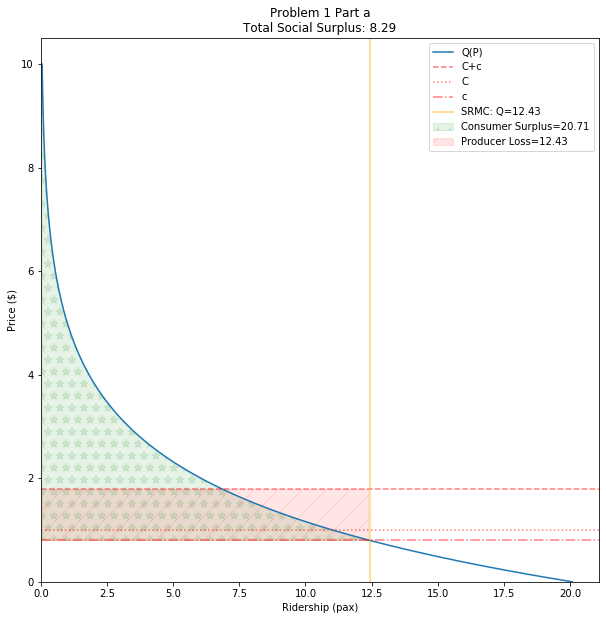

In [4]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at short run marginal cost
Q_c = Q(c)
ax.axvline(Q_c,label=f"SRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)

# display the consumer surplus
consumerSurplus = Q_c/β
ax.fill_between(Qs, c, Ps, where=Qs<Q_c, alpha=0.1,label=f"Consumer Surplus={consumerSurplus:,.2f}",color='green',hatch='*')

# display the producer surplus (in this case, loss)
producerLoss = C * Q_c
ax.fill_between(Qs, c, c+C, where=Qs<Q_c, alpha=0.1,label=f"Producer Loss={producerLoss:,.2f}",color='red',hatch='/')

# calculate total social surplus
tss = Q_c/β + (α-np.log(Q_c))/β*Q_c - (c+C)*Q_c
ax.set_title(f"Problem 1 Part a\nTotal Social Surplus: {tss:,.2f}")



ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


Now using inverse P to double check the graph stays the same, which it does!

In [5]:
def P(Q,α=3.0,β=0.6,c=0.8,C=1.0):
    p = (α-np.log(Q))/β
    return p

In [6]:
Qs = np.linspace(0.1,30,100)
Ps = [P(Q) for Q in Qs]

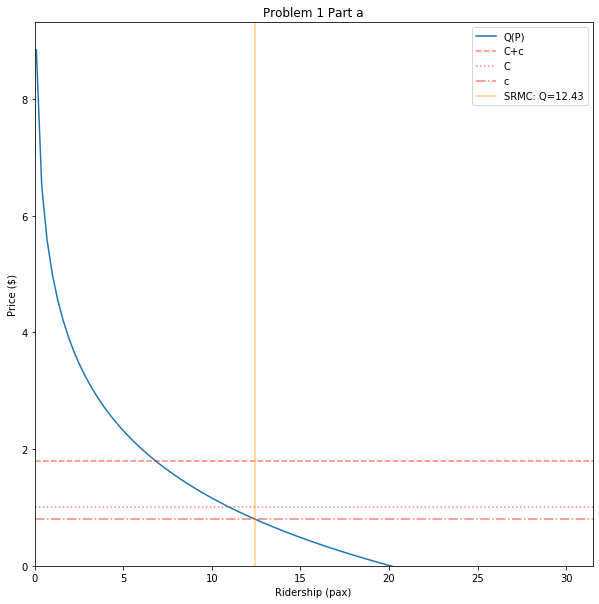

In [7]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 1 Part a")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at short run marginal cost
Q_c = Q(c)
ax.axvline(Q_c,label=f"SRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


In [8]:
# double check math for consumer surplus
consumerSurplus - producerLoss

8.285731109051696

Repeat for P=c+C

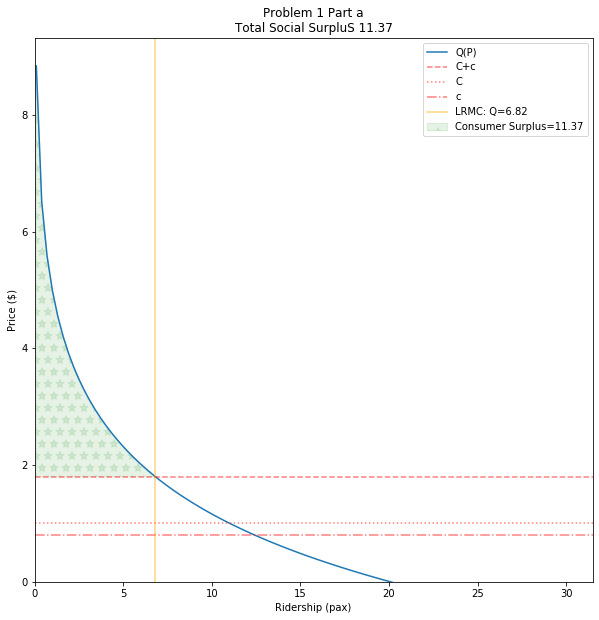

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at short run marginal cost
Q_c = Q(c+C)
ax.axvline(Q_c,label=f"LRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)

# display the consumer surplus
consumerSurplus = Q_c/β
ax.fill_between(Qs, c+C, Ps, where=Qs<Q_c, alpha=0.1,label=f"Consumer Surplus={consumerSurplus:,.2f}",color='green',hatch='*')


# calculate total social surplus
tss = Q_c/β + (α-np.log(Q_c))/β*Q_c - (c+C)*Q_c
ax.set_title(f"Problem 1 Part a\nTotal Social SurpluS {tss:,.2f}")



ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


In [10]:
# double check math for consumer surplus
consumerSurplus - 0

11.368264115484584

In [57]:
(6.82/0.6)+((3-np.log(6.82))/0.6) - (1.8*6.82)

0.8909008802410483

## Part b

TypeError: '<' not supported between instances of 'list' and 'int'

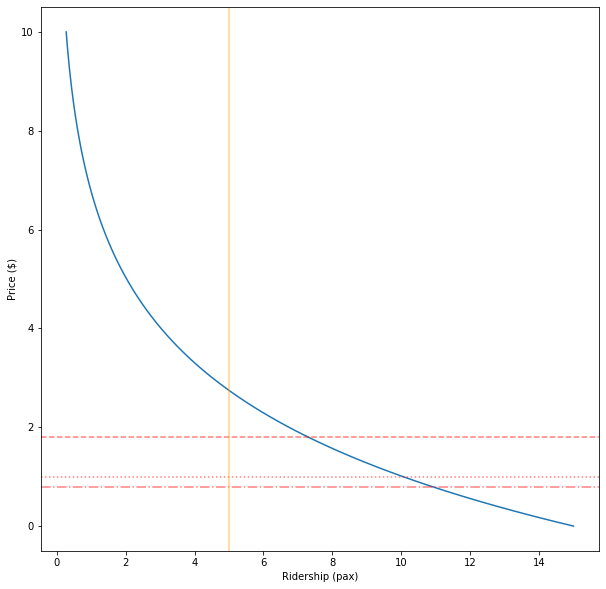

In [68]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at units of five
Q_c = 5
P_c = P(Q_c)
ax.axvline(Q_c,label=f"LRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)

# display the consumer surplus
consumerSurplus = Q_c/β
ax.fill_between(Qs, P_c, Ps, where=Qs<Q_c, alpha=0.1,label=f"Consumer Surplus={consumerSurplus:,.2f}",color='green',hatch='*')


# calculate total social surplus
tss = Q_c/β + (α-np.log(Q_c))/β*Q_c - (c+C)*Q_c
ax.set_title(f"Problem 1 Part a\nTotal Social SurpluS {tss:,.2f}")



ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


# Problem 2

In [26]:
α=15.0
β=0.4
F=10.0
m0 = 0.8
m1 = 0.3

In [27]:
def Q(P,α=α,β=β):
    q = α*np.exp(-β*P)
    return q

In [28]:
def P(Q,α=α,β=β):
    p = (np.log(Q)-np.log(α))/(-β)
    return p

In [29]:
Ps = np.linspace(0,10,100)
Qs = [Q(P) for P in Ps]

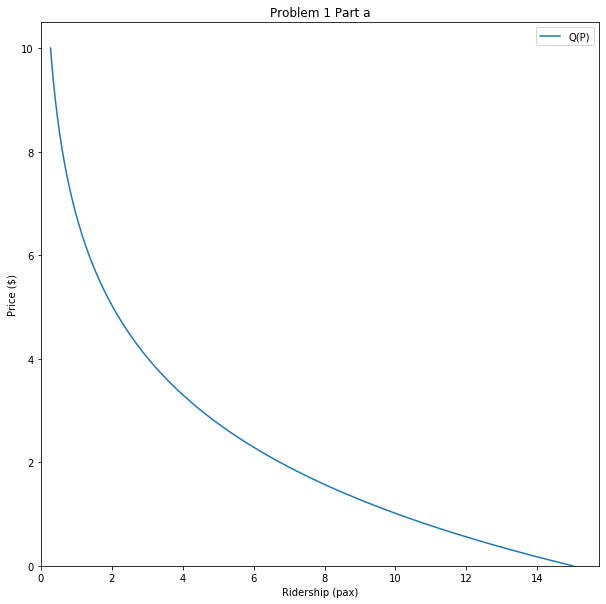

In [30]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 1 Part a")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

In [31]:
Qs_i = np.linspace(0.1,10,100)
Ps_i = [P(Q) for Q in Qs_i]

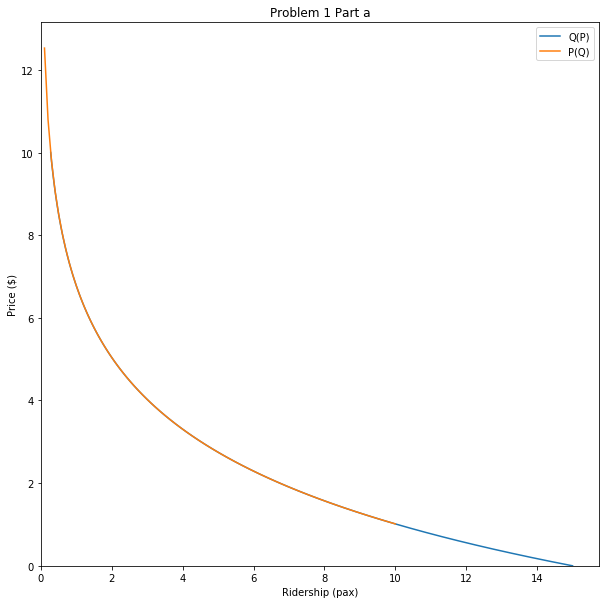

In [32]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 1 Part a")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

In [50]:
# I think this is wrong.  Just keeping until I'm sure
def AC(Q,α=15.0,β=0.4,F=10.0,m0 = 0.8,m1=0.3):
    ac = -β*(F+m0+m1*Q*Q)/(np.log(Q)-np.log(α))
    ac /= Q # confirm if this is right
    return ac

In [53]:
def AC(Q,α=15.0,β=0.4,F=10.0,m0 = 0.8,m1=0.3):
    ac = -β*(F+m0+m1*Q*Q)/Q
    return ac

In [54]:
def MC(Q,α=15.0,β=0.4,F=10.0,m0 = 0.8,m1=0.3):
    mc = -1/(β*Q)
    return mc

In [55]:
ACs = [AC(q) for q in Qs]
MCs = [MC(q) for q in Qs]

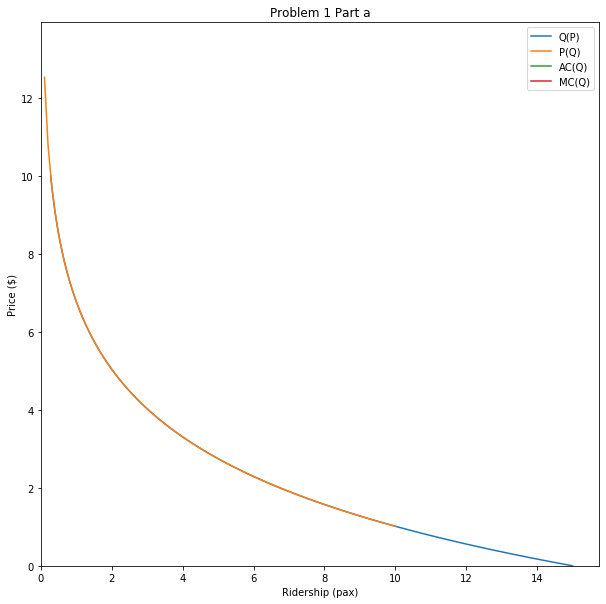

In [56]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 1 Part a")

ax.plot(Qs,ACs,label="AC(Q)")
ax.plot(Qs,MCs,label="MC(Q)")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

## Root Finding Reference

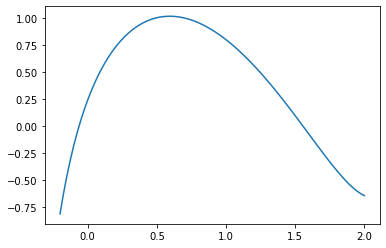

In [18]:
g = 1
v=1.8
f = lambda x: np.tan((x-g)) - x**2 + v

xs = np.linspace(-.2,2,90) #plot 30 xs from 0.02 to 8
ys = list(map(f,xs))
plt.plot(xs,ys)

In [19]:
res = root_scalar(f,x0=1.5,bracket=(1.0,2.0))
print(res)
print(res.root)
print(f(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 1.5561478548711563
1.5561478548711563
-8.770761894538737e-14


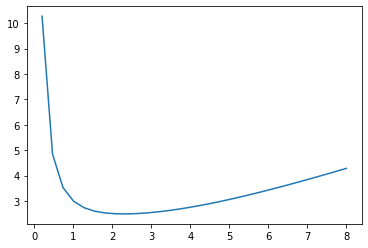

In [20]:
α = 0.5
β = 2.0
w = 2
f = lambda x: α*x + β/x + w**(-x)*x

xs = np.linspace(0.2,8,30) #plot 30 xs from 0.02 to 8
ys = list(map(f,xs))
plt.plot(xs,ys)

In [21]:
res = minimize(lambda x: f(x[0]), x0=[2])
print(res)
print(res.x[0])
# so the minimum is about 2.3

      fun: 2.4866074267908447
 hess_inv: array([[3.65556255]])
      jac: array([-5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([2.29537204])
2.2953720361427346


# Problem 3

# Problem 4

# Problem 5